In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
transactions = pd.read_csv(r"..\Data\01_raw\transactions.csv")
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [5]:
transactions.shape

(83488, 3)

In [6]:
output = []

for column in transactions.columns:

    null_values  = np.sum(pd.isna(transactions[column]))
    unique = transactions[column].nunique()
    column_data_type = transactions[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = transactions.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,mean,std,min,25%,50%,75%,max
date,0,1682,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_nbr,0,54,int64,83488.0,26.939237,15.608204,1.0,13.0,27.0,40.0,54.0
transactions,0,4993,int64,83488.0,1694.602158,963.286644,5.0,1046.0,1393.0,2079.0,8359.0


In [7]:
transactions.drop_duplicates(inplace=True)

In [8]:
transactions.shape

(83488, 3)

([<matplotlib.axis.XTick at 0x15066a0fd90>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

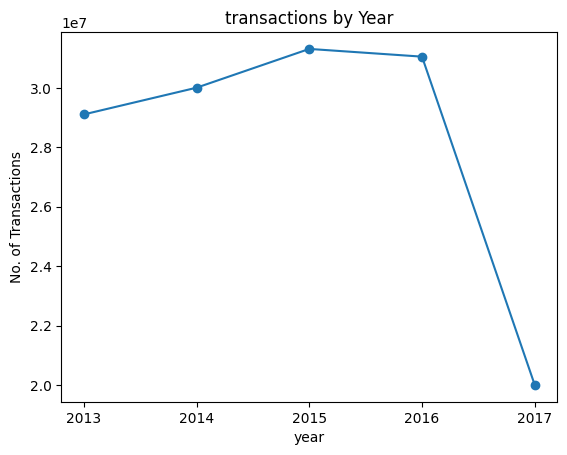

In [12]:
transactions['year'] = pd.DatetimeIndex(transactions['date']).year

yearly_data = transactions.groupby('year')['transactions'].sum().reset_index()
plt.plot(yearly_data['year'], yearly_data['transactions'], marker='o')
plt.title('transactions by Year')
plt.xlabel('year')
plt.ylabel('No. of Transactions')
plt.xticks(range(2013, 2018))

1. Number of cutomers are highest for the year 2015.
2. Number of transactions are considerably high even after 2016 earthquake.
3. Can't say 2017 have lowest number of transaction as data is not given after August 2017.

In [10]:
transactions.columns

Index(['date', 'store_nbr', 'transactions', 'year'], dtype='object')

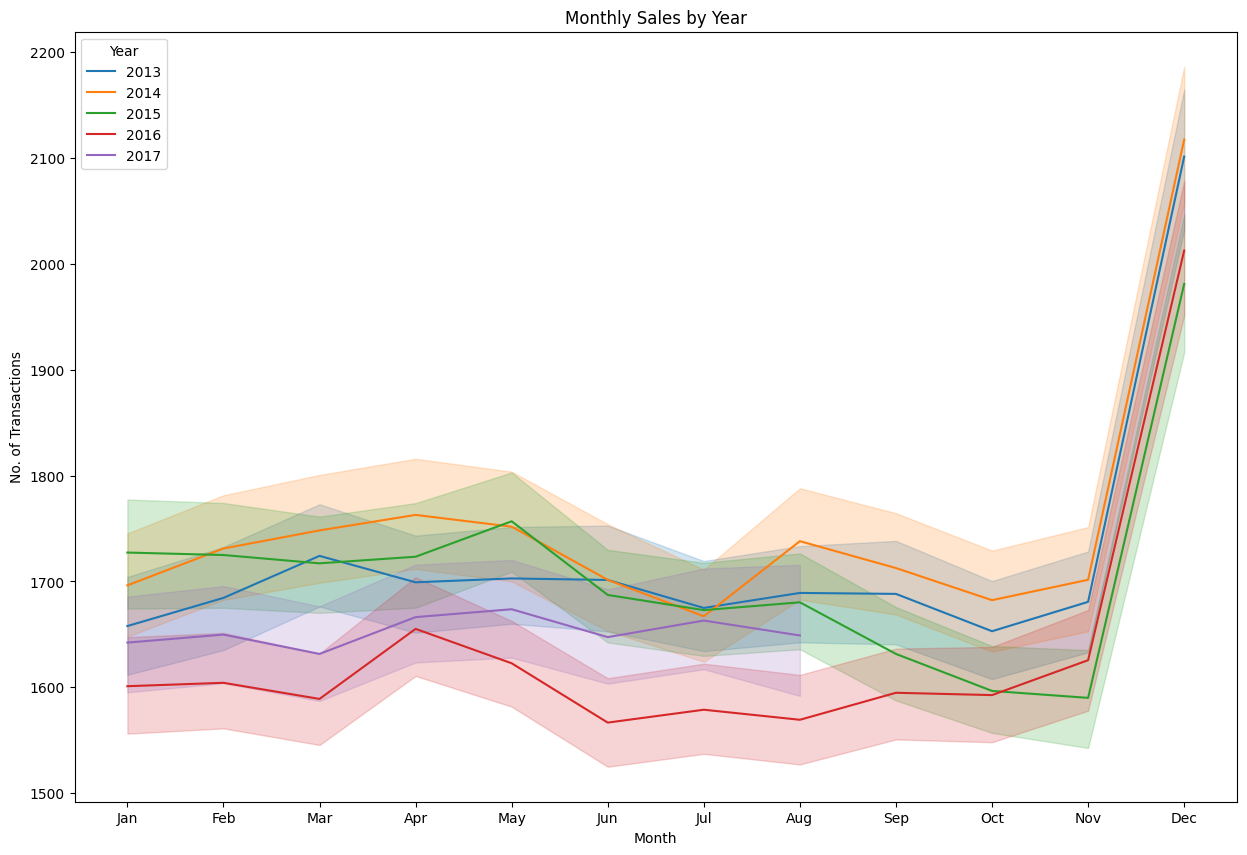

In [26]:
transactions['month'] = transactions['date'].dt.month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(15, 10))
sns.lineplot(data=transactions, x='month', y='transactions', hue='year', palette='tab10')
plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('No. of Transactions')
plt.legend(title='Year')
plt.xticks(ticks=range(1, 13), labels=month_names)
plt.show()

For the month of April, generally speaking there has been an increase in the Number of Transactions. However at the same time during the month of December , there has been a drastic increase in the number of transactions.

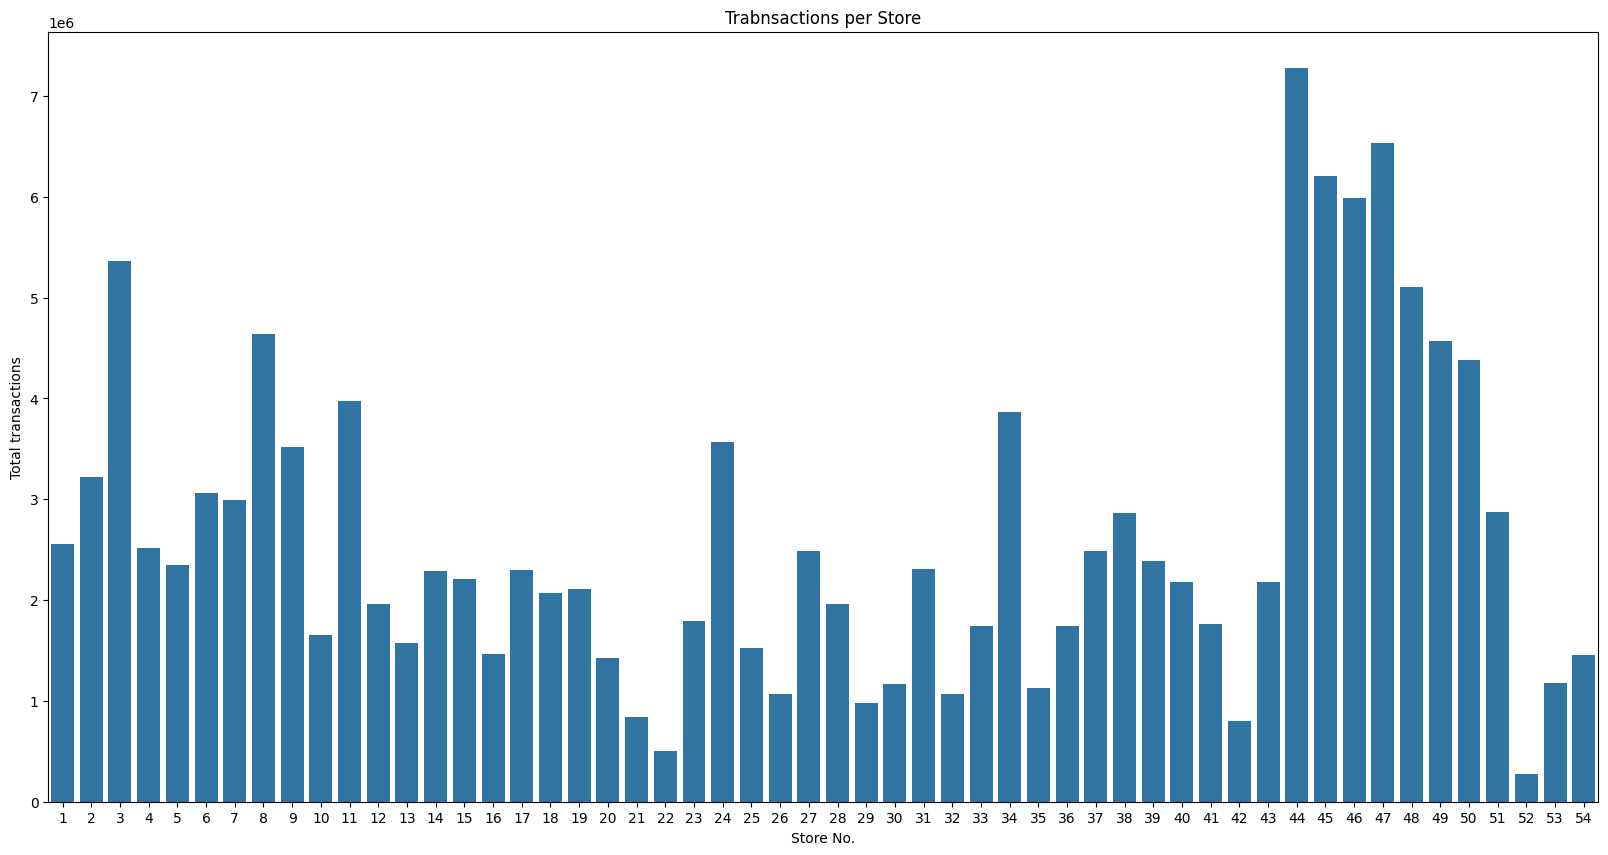

In [32]:
transactions_by_store_number=transactions.groupby('store_nbr')['transactions'].sum().to_frame()
plt.figure(figsize=(20,10))
sns.barplot(x = transactions_by_store_number.index, y= "transactions", data = transactions_by_store_number)
plt.title('Trabnsactions per Store')
plt.ylabel('Total transactions')
plt.xlabel('Store No.')
plt.show()

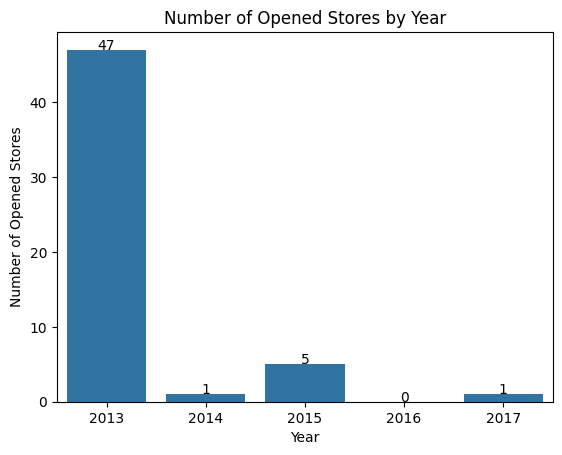

In [14]:
store_ids = {i for i in range(1, 55)}
years = list(transactions['year'].unique())
store_count = []
for i in years:
    filtered = set(transactions[transactions['year'] == i]['store_nbr'])
    store_count.append(len(store_ids) - len(store_ids - filtered))
    store_ids = store_ids - filtered
opened_stores = {"year": years, "store_count": store_count}
opened_stores = pd.DataFrame(opened_stores)
sns.barplot(data=opened_stores, x='year', y='store_count')
for index, row in opened_stores.iterrows():
    plt.text(row.name, row.store_count, str(row.store_count), color='black', ha="center")
plt.xlabel('Year')
plt.ylabel('Number of Opened Stores')
plt.title('Number of Opened Stores by Year')
plt.show()

1. 47 stores were already opened before 2013.
2. One store opened in 2014 and 2017.
3. No new store opened in 2016.